# Data Analysis for Heart Disease Dataset

### Initialization

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib

In [2]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


### Categorical Findings

In [5]:
categories = {}
# get all possible values for each category (important to figure out encodings for categorical data)
for col in df.columns:
    categories[col] = df[col].dropna().unique().tolist()
for cat in categories:
    print(cat)
    print(categories[cat])

Age
[40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 60, 36, 44, 53, 52, 51, 56, 41, 32, 65, 35, 59, 50, 47, 31, 46, 57, 55, 63, 66, 34, 33, 61, 29, 62, 28, 30, 74, 68, 72, 64, 69, 67, 73, 70, 77, 75, 76, 71]
Sex
['M', 'F']
ChestPainType
['ATA', 'NAP', 'ASY', 'TA']
RestingBP
[140, 160, 130, 138, 150, 120, 110, 136, 115, 100, 124, 113, 125, 145, 112, 132, 118, 170, 142, 190, 135, 180, 108, 155, 128, 106, 92, 200, 122, 98, 105, 133, 95, 80, 137, 185, 165, 126, 152, 116, 0, 144, 154, 134, 104, 139, 131, 141, 178, 146, 158, 123, 102, 96, 143, 172, 156, 114, 127, 101, 174, 94, 148, 117, 192, 129, 164]
Cholesterol
[289, 180, 283, 214, 195, 339, 237, 208, 207, 284, 211, 164, 204, 234, 273, 196, 201, 248, 267, 223, 184, 288, 215, 209, 260, 468, 188, 518, 167, 224, 172, 186, 254, 306, 250, 177, 227, 230, 294, 264, 259, 175, 318, 216, 340, 233, 205, 245, 194, 270, 213, 365, 342, 253, 277, 202, 297, 225, 246, 412, 265, 182, 218, 268, 163, 529, 100, 206, 238, 139, 263, 291, 229, 307, 210, 329, 147, 85

Sex: {M, F}
* can do boolean (dummy variable) encoding with 1 being M and 0 being F

ChestPainType: {ATA, NAP, ASY, TA}
* Can do one-hot coding with:
$$\begin{bmatrix}\text{ATA} \\ \text{NAP} \\ \text{ASY} \\ \text{TA}\end{bmatrix}
= \begin{bmatrix} 1, 0, 0, 0 \\ 0, 1, 0, 0 \\ 0, 0, 1, 0 \\ 0, 0, 0, 1 \end{bmatrix}$$

RestingECG: {Normal, ST, LVH}
* Can do one-hot coding with:
$$\begin{bmatrix}\text{Normal} \\ \text{ST} \\ \text{LVH} \end{bmatrix}
= \begin{bmatrix}1, 0, 0\\0,1,0\\0,0,1\end{bmatrix}$$

ExerciseAngina: {N, Y}
* Can do boolean (dummy variable) encoding with 1 being Y and 0 being N

ST_Slope: {Down, Flat, Up}
* Can do ordinal encoding with:
$$\begin{bmatrix}\text{Down}\\\text{Flat}\\\text{Up}\end{bmatrix}=\begin{bmatrix}0\\1\\2\end{bmatrix}$$

The other input features are numeric values

### Setup Data

In [6]:
# 1) Binary/dummy encodings
df['Sex_bin'] = df['Sex'].map({'M': 1, 'F': 0}).astype('int8')
df['ExerciseAngina_bin'] = df['ExerciseAngina'].map({'Y': 1, 'N': 0}).astype('int8')

# 2) Ordinal encoding
st_order = {'Down': 0, 'Flat': 1, 'Up': 2}
df['ST_Slope_ord'] = df['ST_Slope'].map(st_order).astype('int8')

# 3) One-hot Coding
cp_dtype = CategoricalDtype(categories=['ATA', 'NAP', 'ASY', 'TA'], ordered=False)
ecg_dtype = CategoricalDtype(categories=['Normal', 'ST', 'LVH'], ordered=False)

df['ChestPainType'] = df['ChestPainType'].astype(cp_dtype)
df['RestingECG']    = df['RestingECG'].astype(ecg_dtype)

cp_ohe  = pd.get_dummies(df['ChestPainType'], prefix='CP', dtype='int8')
ecg_ohe = pd.get_dummies(df['RestingECG'],    prefix='ECG', dtype='int8')

# Ensure all expected dummy columns exist
for col in ['CP_ATA','CP_NAP','CP_ASY','CP_TA']:
    if col not in cp_ohe:
        cp_ohe[col] = 0
cp_ohe = cp_ohe[['CP_ATA','CP_NAP','CP_ASY','CP_TA']]

for col in ['ECG_Normal','ECG_ST','ECG_LVH']:
    if col not in ecg_ohe:
        ecg_ohe[col] = 0
ecg_ohe = ecg_ohe[['ECG_Normal','ECG_ST','ECG_LVH']]

# 4) Numeric features
numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

# 5) Build feature matrix
X_df = pd.concat(
    [
        df[numeric_cols],
        df[['Sex_bin', 'ExerciseAngina_bin', 'ST_Slope_ord']],
        cp_ohe,
        ecg_ohe,
    ],
    axis=1
)

# 6) Convert to NumPy
X = X_df.to_numpy()
y = df['HeartDisease'].to_numpy().astype('int8').reshape(-1,1)  # target

In [7]:
print(y)

[[0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]


In [8]:
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Feature columns in order:")
print(list(X_df.columns))

X shape: (918, 16)
y shape: (918, 1)
Feature columns in order:
['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'Sex_bin', 'ExerciseAngina_bin', 'ST_Slope_ord', 'CP_ATA', 'CP_NAP', 'CP_ASY', 'CP_TA', 'ECG_Normal', 'ECG_ST', 'ECG_LVH']


<Figure size 640x480 with 0 Axes>

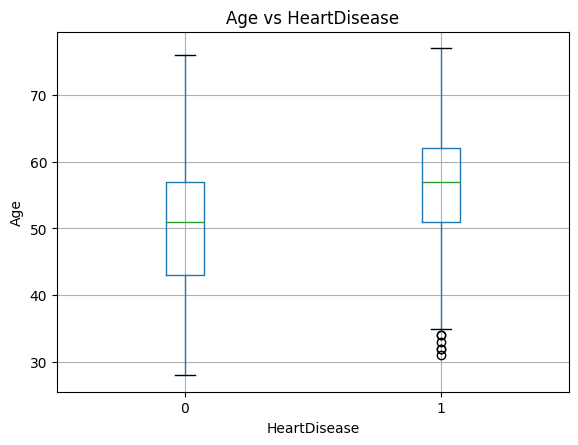

<Figure size 640x480 with 0 Axes>

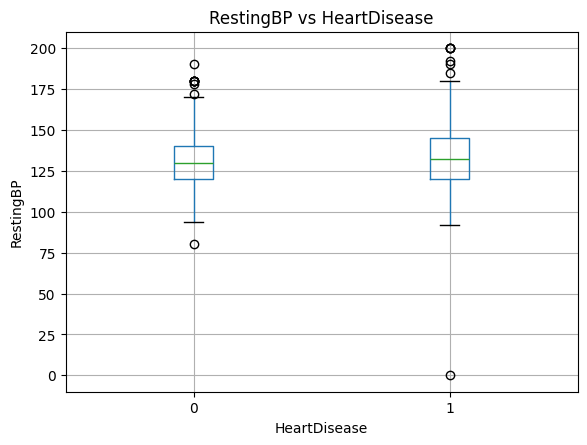

<Figure size 640x480 with 0 Axes>

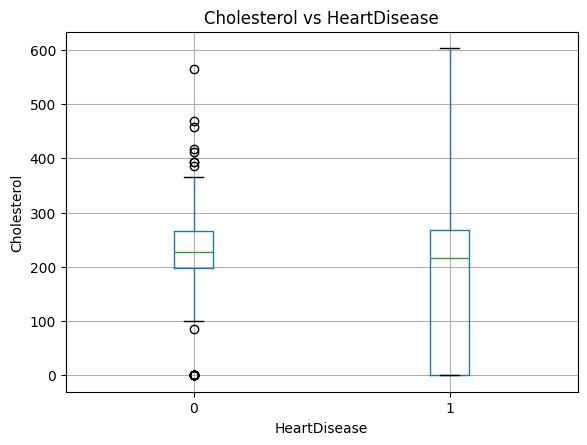

<Figure size 640x480 with 0 Axes>

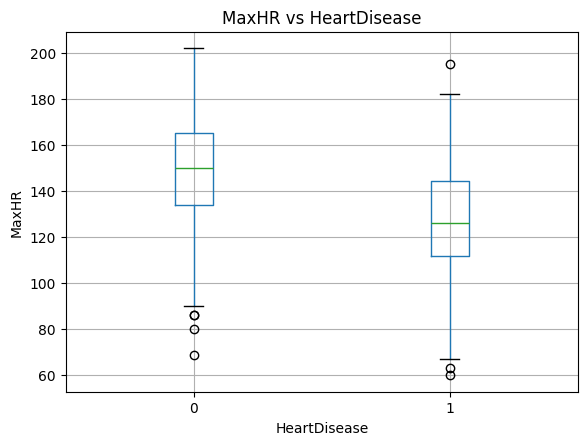

<Figure size 640x480 with 0 Axes>

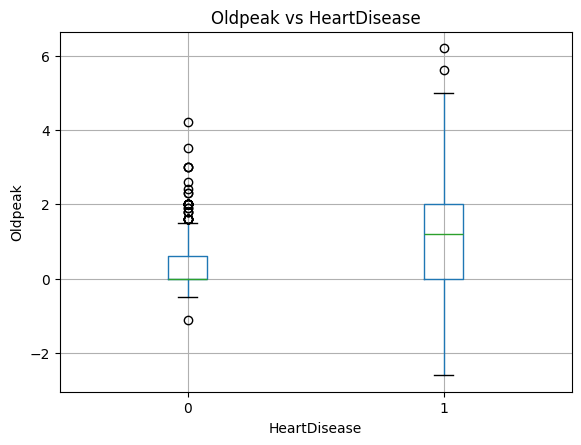

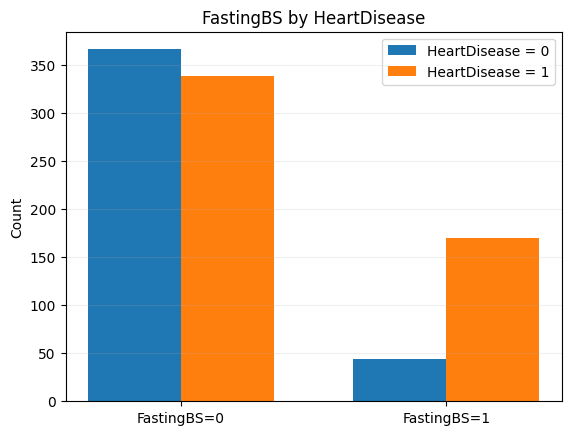

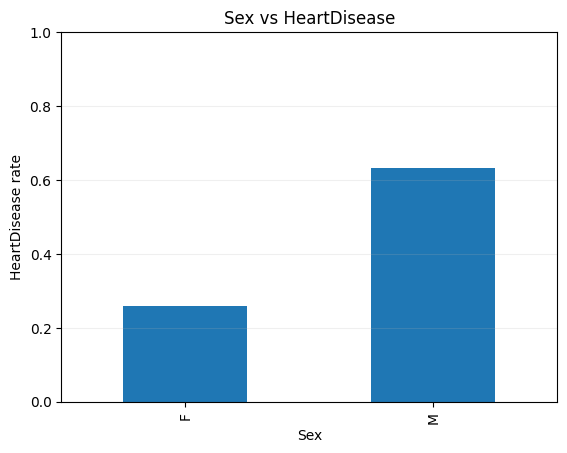

/var/folders/dk/th9c4kyd1xsg3v8mw8s8d9_40000gn/T/ipykernel_55402/3681440535.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rates = df.groupby(col)[target].mean()


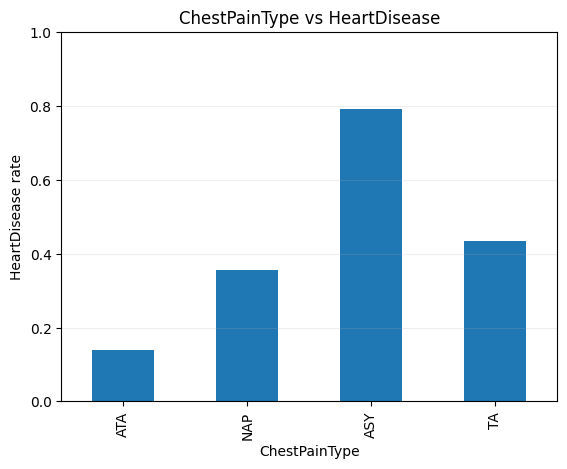

/var/folders/dk/th9c4kyd1xsg3v8mw8s8d9_40000gn/T/ipykernel_55402/3681440535.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rates = df.groupby(col)[target].mean()


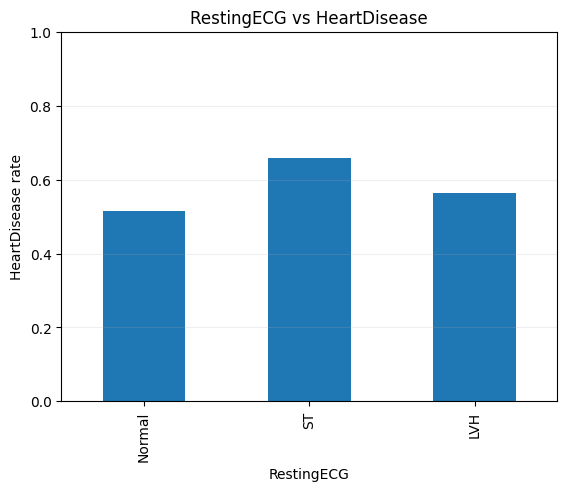

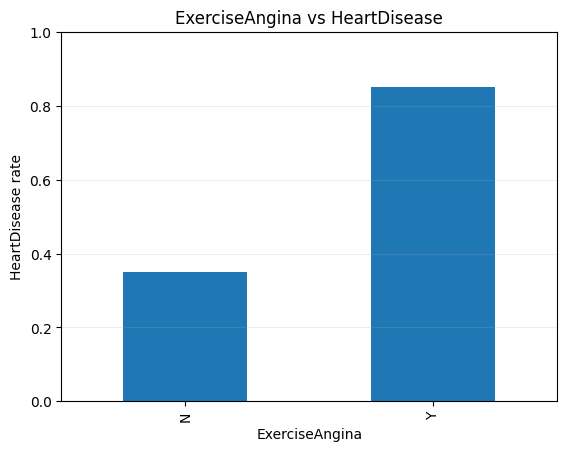

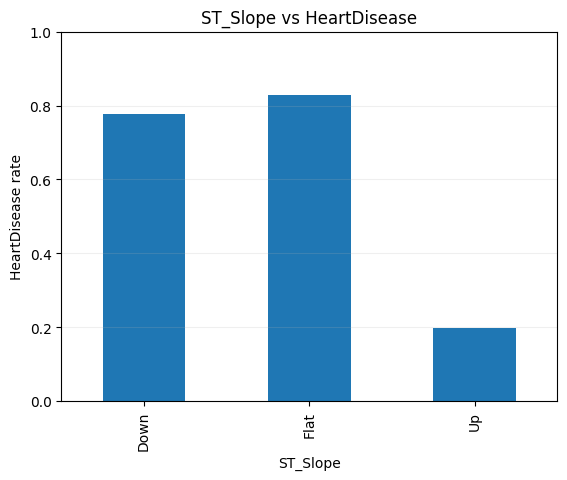

In [9]:
target = 'HeartDisease'

numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
binary_numeric_cols = ['FastingBS']  # known binary numeric
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# ---------- NUMERIC FEATURES (BOXPLOTS) ----------
for col in numeric_cols:
    plt.figure()
    df.boxplot(column=col, by=target)
    plt.title(f"{col} vs HeartDisease")
    plt.suptitle("")  # remove pandas automatic title
    plt.xlabel("HeartDisease")
    plt.ylabel(col)
    plt.show()

# ---------- BINARY NUMERIC FEATURES (BAR COUNTS) ----------
for col in binary_numeric_cols:
    counts = df.groupby([col, target]).size().unstack(fill_value=0)
    plt.figure()
    
    # two bars for 0/1 separated by target
    x = np.arange(2)
    width = 0.35
    plt.bar(x - width/2, counts[0], width, label='HeartDisease = 0')
    plt.bar(x + width/2, counts[1], width, label='HeartDisease = 1')

    plt.xticks(x, [f"{col}=0", f"{col}=1"])
    plt.ylabel("Count")
    plt.title(f"{col} by HeartDisease")
    plt.legend()
    plt.grid(axis='y', alpha=0.2)
    plt.show()

# ---------- CATEGORICAL FEATURES (BAR OF POSITIVE RATE) ----------
for col in categorical_cols:
    rates = df.groupby(col)[target].mean()
    plt.figure()
    rates.plot(kind="bar")
    plt.ylim(0, 1)
    plt.ylabel("HeartDisease rate")
    plt.title(f"{col} vs HeartDisease")
    plt.grid(axis='y', alpha=0.2)
    plt.show()

# Scale Data and Do Train-Test-Val Split

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [27]:
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval,
    test_size=0.25,         # 0.25 of 0.8 = 0.2 overall → 60/20/20 split
    random_state=42,
    stratify=y_trainval
)

In [30]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)
X_train_scaled = np.asarray(X_train_scaled, dtype=float)
X_val_scaled   = np.asarray(X_val_scaled, dtype=float)
X_test_scaled  = np.asarray(X_test_scaled, dtype=float)

# Neural Network with Binary Cross-Entropy Loss

In [10]:
from sklearn.metrics import accuracy_score

In [12]:
# Activation functions
alpha = 0.01  # for ELU

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_deriv(z):
    s = sigmoid(z)
    return s * (1 - s)

def ReLU(z):
    return np.maximum(0, z)

def ReLU_deriv(z):
    return np.where(z >= 0, 1.0, 0.0)

def tanh(z):
    return np.tanh(z)

def tanh_deriv(z):
    t = np.tanh(z)
    return 1 - t**2

def ELU(z):
    return np.where(z >= 0, z, alpha * (np.exp(z) - 1))

def ELU_deriv(z):
    return np.where(z >= 0, 1.0, alpha * np.exp(z))

In [ ]:
# Choose actiation function
f = ReLU
f_deriv = ReLU_deriv

In [14]:
# Output layer: sigmoid
def output_activation(z):
    return sigmoid(z)

In [15]:
def setup_and_init_weights(nn_structure):
    W = {}
    b = {}
    for l in range(1, len(nn_structure)):
        n_in  = nn_structure[l-1]
        n_out = nn_structure[l]
        # He-like init (good for ReLU/ELU; still fine for others)
        W[l] = np.random.randn(n_out, n_in) * np.sqrt(2.0 / (n_in + n_out))
        b[l] = np.zeros(n_out, dtype=float)
    return W, b

In [16]:
def init_tri_values(nn_structure):
    tri_W = {}
    tri_b = {}
    for l in range(1, len(nn_structure)):
        tri_W[l] = np.zeros((nn_structure[l], nn_structure[l-1]))
        tri_b[l] = np.zeros((nn_structure[l],))
    return tri_W, tri_b

In [17]:
def feed_forward(x, W, b):
    a = {1: x}
    z = {}
    num_layers = len(W) + 1  # total layers including input

    for l in range(1, len(W) + 1):
        node_in = a[l]                    # shape (n_l,)
        z[l+1] = W[l].dot(node_in) + b[l] # shape (n_{l+1},)

        if l == len(W):
            # output layer
            a[l+1] = output_activation(z[l+1])
        else:
            # hidden layer
            a[l+1] = f(z[l+1])

    return a, z

In [20]:
def bce_loss(y, a_out, eps=1e-15):
    a_out = np.clip(a_out, eps, 1 - eps)
    return -np.sum(y * np.log(a_out) + (1 - y) * np.log(1 - a_out))

In [21]:
def calculate_out_layer_delta(y, a_out, z_out):
    # For sigmoid output + BCE:
    return (a_out - y)

def calculate_hidden_delta(delta_plus_1, w_l, z_l):
    return np.dot(w_l.T, delta_plus_1) * f_deriv(z_l)

In [22]:
def train_nn(nn_structure, X, y, iter_num=3000, alpha=0.25, lambda_val=0.0):
    """
    nn_structure: [n_in, h1, ..., n_out]
    X: shape (N, n_in)
    y: shape (N, n_out)  (for binary with single output, n_out = 1)
    iter_num: number of GD iterations
    alpha: learning rate
    lambda_val: L2 regularization strength
    """
    W, b = setup_and_init_weights(nn_structure)
    cnt = 0
    N = len(y)
    avg_cost_func = []
    print(f'Starting gradient descent for {iter_num} iterations')

    while cnt < iter_num:
        if cnt % 1000 == 0:
            print(f'Iteration {cnt} of {iter_num}')
        tri_W, tri_b = init_tri_values(nn_structure)
        avg_cost = 0.0

        # loop over all samples
        for i in range(N):
            delta = {}
            a, z = feed_forward(X[i, :], W, b)

            # backprop from output layer to first hidden
            for l in range(len(nn_structure), 0, -1):
                if l == len(nn_structure):
                    # output layer
                    delta[l] = calculate_out_layer_delta(y[i, :], a[l], z[l])
                    # accumulate BCE loss
                    avg_cost += bce_loss(y[i, :], a[l])
                else:
                    if l > 1:
                        # hidden layers
                        delta[l] = calculate_hidden_delta(delta[l+1], W[l], z[l])
                    # accumulate gradients for W[l] and b[l]
                    tri_W[l] += np.dot(delta[l+1][:, np.newaxis],
                                       a[l][:, np.newaxis].T)
                    tri_b[l] += delta[l+1]

        # L2 regularization term on weights
        l2_cost = 0.0
        for l in range(1, len(nn_structure)):
            l2_cost += np.sum(W[l] ** 2)

        # gradient descent update
        for l in range(len(nn_structure) - 1, 0, -1):
            W[l] += -alpha * (1.0 / N * tri_W[l] + lambda_val * W[l])
            b[l] += -alpha * (1.0 / N * tri_b[l])

        # average loss over all samples + L2 penalty
        avg_cost = 1.0 / N * avg_cost + (lambda_val / 2.0) * l2_cost
        avg_cost_func.append(avg_cost)
        cnt += 1

    return W, b, avg_cost_func

In [23]:
def predict_y(W, b, X, nn_structure, threshold=0.5):
    N = X.shape[0]
    n_out = nn_structure[-1]
    y_pred = np.zeros((N,), dtype=int)

    for i in range(N):
        a, z = feed_forward(X[i, :], W, b)
        out = a[len(nn_structure)]  # final layer activation

        if n_out == 1:
            # binary: threshold on sigmoid output
            y_pred[i] = 1 if out[0] >= threshold else 0
        else:
            # multi-output: pick largest probability
            y_pred[i] = np.argmax(out)

    return y_pred


In [74]:
nn_structure = [16, 15, 15, 15, 1]
num_iters = 3000
alpha = 0.01
lambda_val = 0.05

In [75]:
W, b, avg_cost_func = train_nn(
    nn_structure=nn_structure,
    X=X_train,
    y=y_train,
    iter_num=num_iters,
    alpha=alpha,
    lambda_val=lambda_val
)

Starting gradient descent for 3000 iterations
Iteration 0 of 3000
Iteration 1000 of 3000
Iteration 2000 of 3000


In [73]:
y_pred = predict_y(W, b, X_test, nn_structure, threshold=0.5)
acc = accuracy_score(y_test, y_pred)
print(acc)

0.7554347826086957
